In [241]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader,Subset
import torchvision
import os
import cv2 as cv
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

### custom dataset class

In [ ]:
classes=["COVID","Lung_Opacity","Normal","Viral_Pneumonia"]

class XrayImagesDataset(Dataset):
  def __init__(self,data_dir,classes,transform):
    
    self.data_dir=data_dir
    self.transform=transform
    self.classes=classes
    self.data=[]
    
    for c in self.classes:
      for img in os.listdir(self.data_dir+"/"+c+"/images/"):
        self.data.append({"path":img,"class":c})
  
  def __len__(self):
    return len(self.data)
    
  def __getitem__(self,index):
    
    img_class=self.data[index]["class"]
    img_name=self.data[index]["path"]
    path=self.data_dir+"/"+img_class+"/images/"+img_name
    
    image =  Image.open(path).convert('RGB')
        
    return self.transform(image),self.data[index]["class"]

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
])
data=XrayImagesDataset("dataset/COVID-19_Radiography_Dataset",classes,transform)

### data splitting into train val and test then loading it in the dataloader

In [ ]:
#so i tried this the other way by splitting the custom dataset class
#then loading train valid test seperately but SPLITTING TOOK AGES
#so i used this method i found online it splits data indices instead of
#the data itself then uses the pytorch Subset class for each split and loads 
indices = list(range(data.__len__()))

train_indices, valid_and_test_indices = train_test_split(indices, test_size=0.2, random_state=42)

valid_indices, test_indices = train_test_split(valid_and_test_indices, test_size=0.5, random_state=42)

train_subset = Subset(data, train_indices)
valid_subset = Subset(data, valid_indices)
test_subset = Subset(data, test_indices)

train_dataloader = DataLoader(train_subset, batch_size=100)
valid_dataloader = DataLoader(valid_subset, batch_size=100)
test_dataloader = DataLoader(test_subset, batch_size=100)

### some visualisation

In [ ]:
#get a batch of the first 100 images
images, labels = next(iter(train_dataloader))

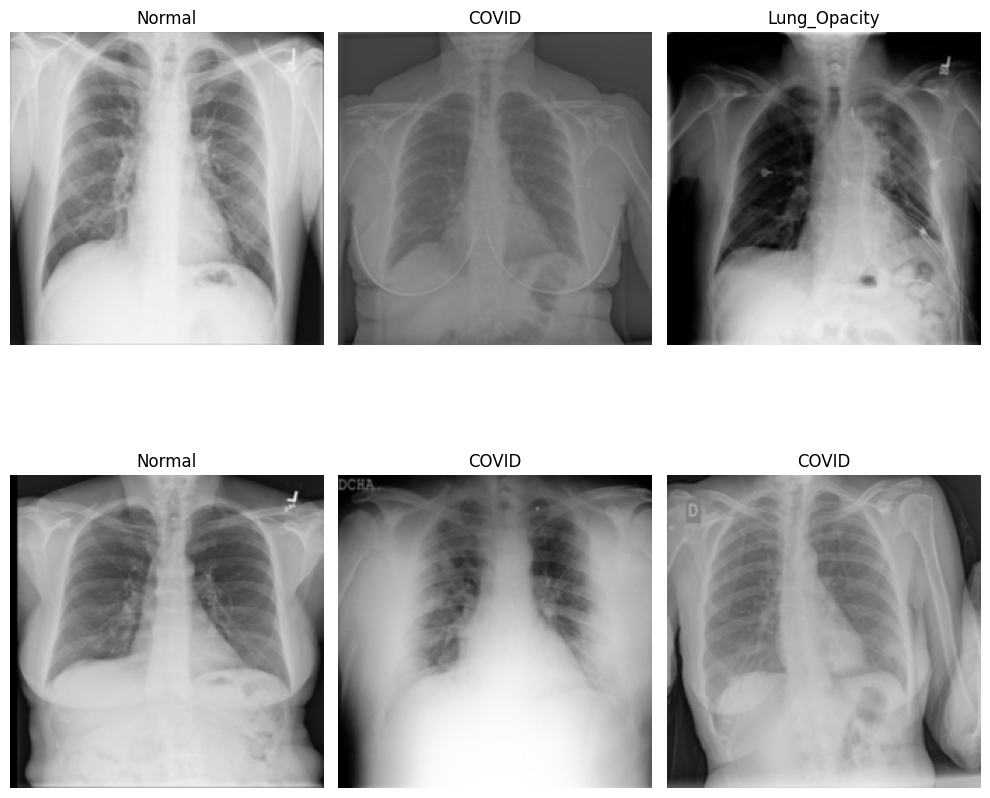

In [246]:
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1) 
    #transpose because pillow wants to act all special and different from opencv and stuff whatever man
    image = images[i].numpy().transpose((1, 2, 0))
    plt.title(labels[i])
    plt.axis('off')
    plt.imshow(image)
plt.tight_layout()
plt.show()